In [70]:
import numpy as np
import pandas as pd

# 지수형태로 프린트되는 것을 방지
np.set_printoptions(precision=2, suppress=True)

pd_data = pd.read_csv("개인통관고유부호 발급현황_20230131기준.csv", encoding="cp949")
np_data = pd_data.to_numpy()
print(np_data[:12])

[[  2016      1 166123]
 [  2016      2 160144]
 [  2016      3 181751]
 [  2016      4 179225]
 [  2016      5 176778]
 [  2016      6 165140]
 [  2016      7 159990]
 [  2016      8 168529]
 [  2016      9 180808]
 [  2016     10 189176]
 [  2016     11 211735]
 [  2016     12 206262]]


In [71]:
print(np_data[-1])

[  2023      1 181985]


In [72]:
# 2016년 1월부터 2023년 1월까지(포함) 개인통관고유부호를 신규 발급 받은 건수 (합)
print("총 발급 건수 :", np.sum(np_data[:,2], axis=0))

총 발급 건수 : 19811412


In [73]:
# 2016년 1월부터, 2020년 12월까지(포함), 매년 신규부호 발급 받은 건수
for n in range(7) :
    print(f"{2016+n}년 :", np.sum(np_data[12*n:12*(n+1), 2], axis=0))

2016년 : 2145661
2017년 : 2428779
2018년 : 2746613
2019년 : 3357204
2020년 : 3253296
2021년 : 3361786
2022년 : 2336088


In [74]:
# 2016년 1월부터, 2022년 12월까지(포함), 월별 신규부호 발급 받은 건수
for i in range(1,13) :
    print(f"{i}월 :", np.sum(np_data[i-1::12,2],axis=0))

1월 : 1824210
2월 : 1535634
3월 : 1769114
4월 : 1540919
5월 : 1567368
6월 : 1556606
7월 : 1560707
8월 : 1566450
9월 : 1629510
10월 : 1680455
11월 : 1839020
12월 : 1741419


In [75]:
# 필터 적용 예시(년도별)
filter1 = np_data[:,0]==2017
print(np_data[filter1])

[[  2017      1 203790]
 [  2017      2 224099]
 [  2017      3 211963]
 [  2017      4 191588]
 [  2017      5 198337]
 [  2017      6 191560]
 [  2017      7 184065]
 [  2017      8 207140]
 [  2017      9 204379]
 [  2017     10 190081]
 [  2017     11 227411]
 [  2017     12 194366]]


In [76]:
# 필터 적용 예시(월별)
filter2 = np_data[:,1]==1
print(np_data[filter2])

[[  2016      1 166123]
 [  2017      1 203790]
 [  2018      1 203923]
 [  2019      1 270568]
 [  2020      1 243144]
 [  2021      1 330413]
 [  2022      1 224264]
 [  2023      1 181985]]


In [77]:
#다른 풀이
print("*********************************")
# 2016년 1월부터 2023년 1월까지(포함) 개인통관고유부호를 신규 발급 받은 건수 (합)
print("총 발급 건수 :", np.sum(np_data[:,2], axis=0))

print("*********************************")

# 2016년 1월부터, 2020년 12월까지(포함), 매년 신규부호 발급 받은 건수
yr_x = []
yr_y = []
for yr in range(2016,2023) :
    filter1 = np_data[:,0]==yr
    rt = np.sum(np_data[filter1], axis=0)
    rt1 = np.mean(np_data[filter1], axis=0)
    yr_x.append(yr)
    yr_y.append(rt[2])
    print(yr, rt[2], rt1[2])

# 1~12까지 더한 값 확인
# print(np.sum([x for x in range(1,13)]))
print("*********************************")


# 2016년 1월부터, 2022년 12월까지(포함), 월별 신규부호 발급 받은 건수
mo_x = []
mo_y = []
for mo in range(1,13) :
    filter1 = np_data[:,1]==mo
    rt = np.sum(np_data[filter1], axis=0)
    rt1 = np.mean(np_data[filter1], axis=0)
    mo_x.append(mo)
    mo_y.append(rt[2])
    print(mo, rt[2], rt1[2])
print("*********************************")

*********************************
총 발급 건수 : 19811412
*********************************
2016 2145661 178805.08333333334
2017 2428779 202398.25
2018 2746613 228884.41666666666
2019 3357204 279767.0
2020 3253296 271108.0
2021 3361786 280148.8333333333
2022 2336088 194674.0
*********************************
1 1824210 228026.25
2 1535634 219376.2857142857
3 1769114 252730.57142857142
4 1540919 220131.2857142857
5 1567368 223909.7142857143
6 1556606 222372.2857142857
7 1560707 222958.14285714287
8 1566450 223778.57142857142
9 1629510 232787.14285714287
10 1680455 240065.0
11 1839020 262717.14285714284
12 1741419 248774.14285714287
*********************************


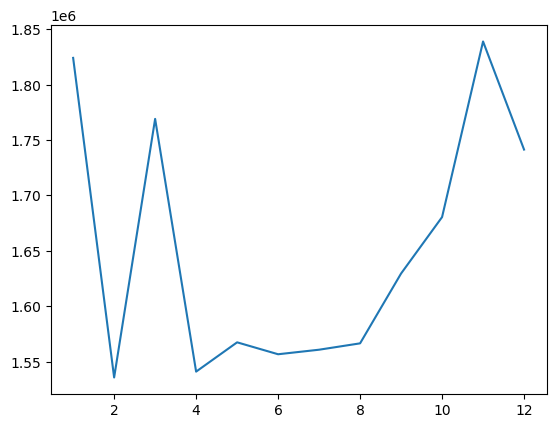

In [78]:
import matplotlib.pyplot as plt

# 2016년 1월부터, 2022년 12월까지(포함), 월별 신규부호 발급 받은 건수
_, axe = plt.subplots()
axe.plot(mo_x, mo_y)

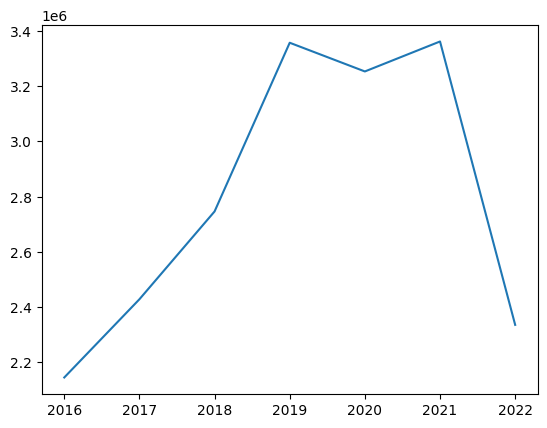

In [79]:
# 2016년 1월부터, 2020년 12월까지(포함), 매년 신규부호 발급 받은 건수
_, axe = plt.subplots()
axe.plot(yr_x, yr_y)